# Como criar o seu primeiro projeto de Machine Learning
#### Esse notebook faz parte do Workshop de Machine Learning com [Fernanda Wanderley](https://www.linkedin.com/in/nandaw/) programa Sprint PrograMaria #MulheresPodem | Inteligência Artificial para Devs.
__Sobre o programa__: são 5 módulos em 10 dias de atividades, lives, vídeos e muita interação para a apresentação macro do tópico Inteligência Artificial.

__Sobre a progra{m}aria__: startup social que empodera meninas e mulheres com habilidades em tecnologia e programação. Realiza eventos, oficinas, cursos de formação técnica e outras ações que ajudam empresas a promover diversidade e a recrutar mais mulheres.

__Sobre o projeto__: A proposta do Workshop ministrado pela Fernanda é ensinar os principais conceitos e passo a passo da aplicação de ML para aprendizado supervisionado, por meio da resolução de um problema: previsão de nota dos filmes no IMDb.

In [1]:
# Bibliotecas utilizadas na análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

O conjunto de dados utilizados no projeto podem ser encontrados no Kaggle, na [página](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset) IMDB 5000 Movie Dataset.

In [2]:
# Leitura dos dados e prévia do banco
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Conhecendo o banco de dados
Nesse primeiro contato com o df já podemos observar resultados importantes e que deverão ser tratados antes da modelagem. Temos dados duplicados e algumas variáveis com alta proporção de dados faltantes. 

In [3]:
descricao = pd.DataFrame({'Variáveis': df.columns, 'Tipos': list(df.dtypes), 'Prop_NA': (df.isna().sum()/df.shape[0])})
print("Dimensões:",df.shape)
print("Dados duplicados:", df.duplicated().sum())
print(descricao)

Dimensões: (5043, 28)
Dados duplicados: 45
                                           Variáveis    Tipos   Prop_NA
color                                          color   object  0.003768
director_name                          director_name   object  0.020623
num_critic_for_reviews        num_critic_for_reviews  float64  0.009915
duration                                    duration  float64  0.002974
director_facebook_likes      director_facebook_likes  float64  0.020623
actor_3_facebook_likes        actor_3_facebook_likes  float64  0.004561
actor_2_name                            actor_2_name   object  0.002578
actor_1_facebook_likes        actor_1_facebook_likes  float64  0.001388
gross                                          gross  float64  0.175292
genres                                        genres   object  0.000000
actor_1_name                            actor_1_name   object  0.001388
movie_title                              movie_title   object  0.000000
num_voted_users      

Ainda reconhecendo o dataframe, temos abaixo um mapa dos dados faltantes. Podemos ver uma concentração grande de NaNs nas colunas *gross*, *budget*, *aspect_ratio* e *content_rating*.
Quanto às linhas, tenhos um filme com dados faltantes para 8 variáveis.

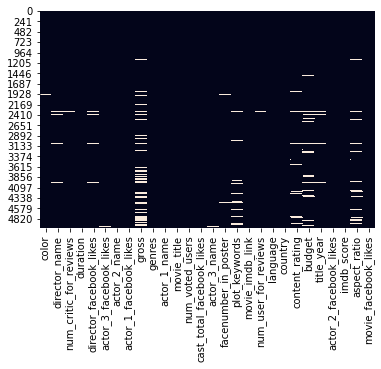

In [4]:
sns.heatmap(df.isnull(), cbar=False)

### Começaaa a partida!
Vamos tratar os problemas encontrados anteriormente: dados duplicados e dados faltantes.
- Sem variabilidade não conseguimos modelar nada, por esse motivo excluir os dados duplicados é tão importante;
- Um exemplo de variável com muitos dados faltantes é *gross*, se tratássemos esse caso com a exclusão das linhas com dados faltantes teríamos uma grande perda de observações!

In [5]:
df.drop_duplicates(inplace=True)
descricao.sort_values(by='Prop_NA', ascending=False)

,Variáveis,Tipos,Prop_NA
gross,gross,float64,0.175292
budget,budget,float64,0.097561
aspect_ratio,aspect_ratio,float64,0.065239
content_rating,content_rating,object,0.060083
plot_keywords,plot_keywords,object,0.030339
title_year,title_year,float64,0.021416
director_name,director_name,object,0.020623
director_facebook_likes,director_facebook_likes,float64,0.020623
num_critic_for_reviews,num_critic_for_reviews,float64,0.009915
actor_3_name,actor_3_name,object,0.004561


Para o tratamento de dados faltantes utilizaremos, para os dados numéricos, imputação pela média ou mediana. Já para os dados categóricos, os dados faltantes serão substituídos pelas categorias que mais apareceram dentro da variável.

Como temos muitas variáveis numéricas, para a escolha entre os dois métodos de imputação foi feita através da função *imput_numeric_if*. A função recebe como argumentos o banco de dados e a coluna a ser analisada. São calculados os quartis 1 e 3 da variável e a amplitude dos dois valores (*IQR*). Quando a variável possui outliers a imputação realizada é pela mediana e quando a variável não possuir outliers é utilizada a média. Isso se deve ao fato de que a mediana é uma medida centro não infuenciada por valores discrepantes.

Ah, a regra aplicada para decidir se um valor é outlier ou não é a mesma aplicada nos boxplots (os pontos fora da cerca).

In [6]:
# Guardando o nome das colunas numéricas e categóricas
numeric = df.select_dtypes(include=['float64','int64']).columns
categorical = df.select_dtypes(include='object').columns

# Função para facilitar a imputação de dados numéricos
def imput_numeric_if(data,col):
    q1, q3 = data[col].describe()[4], data[col].describe()[6]
    IQR = q3 - q1
    out = (q1-1.5*IQR,q3+1.5*IQR)
    if (data[col] < out[0]).sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)        
    elif (data[col] > out[1]).sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)        
    else:
        data[col].fillna(data[col].mean(), inplace=True)

    return(data)

# Imputação
for i in range(len(numeric)):
    imput_numeric_if(df,numeric[i])

for j in range(len(categorical)):
    df[categorical[j]].fillna(df[categorical[j]].mode()[0], inplace=True)


### Feature engeneering
Vamos criar duas variáveis que podem ser importantes para a previsão da nota do filme no IMDB: *profit* e *roi*.

In [7]:
df['profit'] = df['budget'] - df['gross']
df['roi'] = df['gross']/df['budget']

### Exploração de dados
Faremos uma breve exploração dos dados. De cara conseguimos reconhecer variáveis que não agregam para o nosso objetivo. 
É esperado que os títulos dos filmes, nome dos diretos, nome dos atores, link do filme no imdb e palavras chave sejam únicos ou perto disso. 
Há uma concentração muito grande de observações em poucos valores para as variáveis *genres*, *language* e *country*, sendo assim escolhi removê-las.

In [8]:
df.drop(columns=['movie_title', 'color', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 
                 'country', 'language', 'plot_keywords', 'movie_imdb_link'], axis=1, inplace=True)

Outro passo importante é verificar a correlação das variáveis. No gráfico de correlação abaixo podemos verificar valores altos de correlação (maiores do que 0,6). Com a análise do gráfico a solução escolhida foi a remoção das variáveis *budget*, *cast_total_facebook_likes*, *num_voted_users*.
Para as variáveis *num_critic_for_reviews* e *num_user_for_reviews*, optei pela criação da razão entre as duas: *critic_review_ratio*.

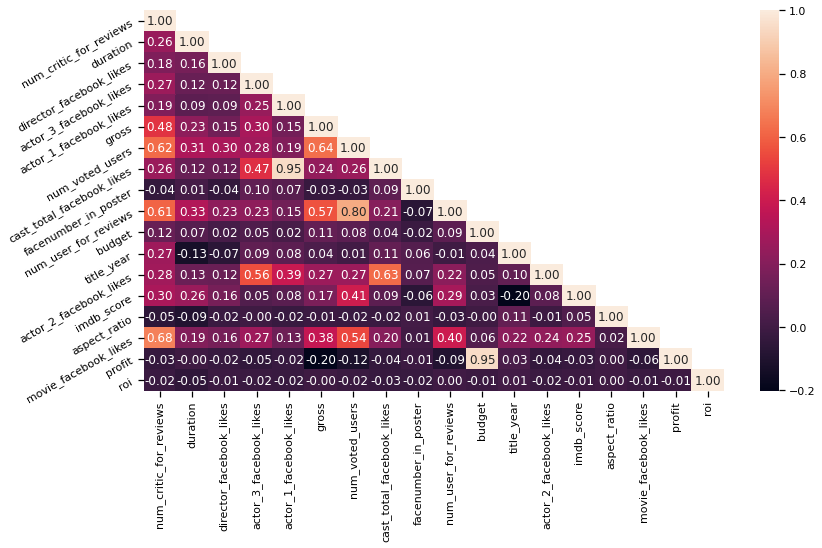

In [9]:
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [10]:
df.drop(columns=['budget', 'cast_total_facebook_likes','num_voted_users'], axis=1, inplace=True)
df['critic_review_ratio'] = df['num_critic_for_reviews']/df['num_user_for_reviews']

Observando novamente se o problema de variáveis muito correlacionadas persiste...
Não! Já retiramos os casos mais extremos.

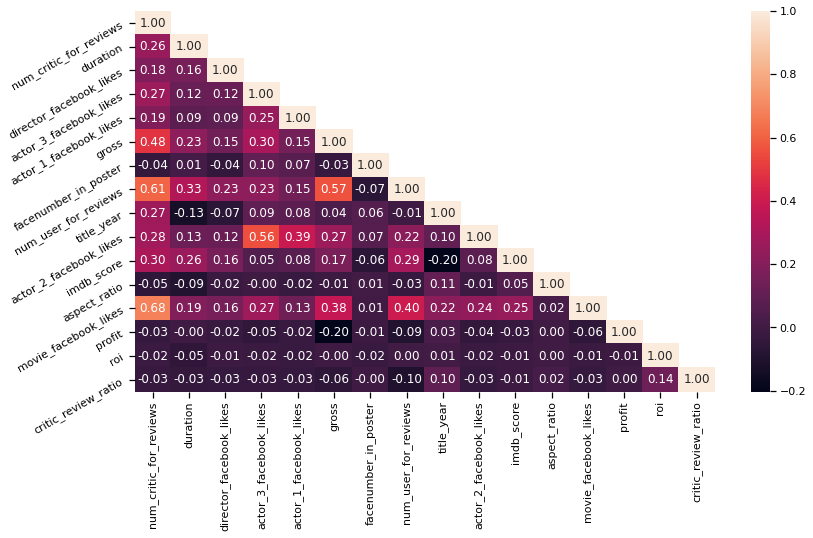

In [11]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Modelagem!!!
Iniciando a modelagem temos algumas manipulações a fazer:
- Transformação das variáveis categóricas em variáveis dummy (binárias) para a inclusão no modelo;
- Separação do dataframe em features (X) e target (y);
- Normalização dos dados para que as unidades de medida das variáveis não tenham influência no modelo.

In [12]:
categorical = df.select_dtypes(include='object').columns
df = pd.get_dummies(data = df, columns=set(categorical), drop_first=True)

In [13]:
list(df.columns).remove('imdb_score')
X = df[df.columns]
y = df['imdb_score']
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

O modelo escolhido para a previsão de nota dos filmes no IMDb foi o Random Forest, florestas aleatórias. É um modelo baseado em árvores, mais precisamente na aplicação de várias árvores <s> floresta</s>.
No dicionário *param_grid* estão os parâmetros escolhidos para testar as combinações. Utilizei a função *GridSearchCV* do sckit learn para aplicar a validação cruzada e varrer todas as combinações de parâmetros.

In [14]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

rf = RandomForestRegressor(random_state=4)
grid = GridSearchCV(rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid.fit(X, y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

A função *evaluate* foi criada para avaliar a distribuição de erros do melhor modelo da fase de teste. Além da medida mais comumente utilizada, erro médio, decidi avaliar também o erro máximo, mínimo e o mediano. Dessa forma não nos prenderemos apenas à uma medida que pode estar influenciada por valores discrepantes.

In [15]:
# Função para avaliar o modelo
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('\n')
    print('---- Performance do modelo escolhido em todos os dados ----')
    print('Erro médio: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Erro mediano: {:0.4f} degrees.'.format(np.median(errors)))
    print('Erro máximo: {:0.4f} degrees.'.format(np.max(errors)))
    print('Erro mínimo: {:0.4f} degrees.'.format(np.min(errors)))
    print('Acurácia = {:0.2f}%.'.format(accuracy))
    return accuracy

### Resultados
Para finalizar temos os resultados do modelo. A métrica de avaliação utilizada no GridSearchCV foi o R2. Foi obtido um valor satisfatório para o pouco tempo de workshop. <s>estava esperando algo bem pior hahaha</s>

In [16]:
print('---- Performance no set de Teste ----')
print('Melhor R2 no Grid Search:', grid.best_score_)
print('Melhores parâmetros:', grid.best_params_)

---- Performance no set de Teste ----
Melhor R2 no Grid Search: 0.7766793663878321
Melhores parâmetros: {'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


Após aplicar a função *evaluate* no melhor resultado obtido pelo GridSearchCV, pudemos confirmar a boa performance do modelo.
O MAPE está em 22%, mas quando olhamos para outros pontos da distribuição podemos perceber que essa média está sendo bastante influenciada por valores discrepantes. O erro mediano relativo absoluto ficou em 14%.

In [17]:
best_grid = grid.best_estimator_
grid_accuracy = evaluate(best_grid, X, y)



---- Performance do modelo escolhido em todos os dados ----
Erro médio: 0.2370 degrees.
Erro mediano: 0.1435 degrees.
Erro máximo: 3.4824 degrees.
Erro mínimo: 0.0000 degrees.
Acurácia = 95.52%.


### Fim do workshop de Machine Learning do Programaria!!!
Mas esse projeto não acaba por aqui, vou deixar alguns itens de próximos passos que podem ajudar a melhorar o modelo.
- Feature importance;
- Aumentar o dicionário de hiperparâmetros.

Até breve!